In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot  as plt

/home/pawn/.pyenv/versions/3.7.1/envs/py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/pawn/.pyenv/versions/3.7.1/envs/py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('../../data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# 简略查看一下数据集是否完整，是否有异常情况
print(df.shape)
print(df.count())
print(df.dtypes)

(200, 4)
TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# pearson相关系数
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


> 分析结论：
从pearson相关系数可以看出
- 最终的销售量 和TV 相关性最强，其次是 Radio 最差是 Newspaper 
- 销售量和  TV 和 Radio 是强先关的 和 Newspaper 是弱相关的。

In [6]:
# 由于newspaper 的相关性太弱 直接可以舍去
X, y = df.iloc[:, 0:2].values, df.Sales.values

In [7]:
# 切割数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# 开始训练数据集
lr = LinearRegression()
lr.fit(X_train, y_train)
print("权重:", lr.coef_)
print("截距:", lr.intercept_)

权重: [0.04419729 0.19946953]
截距: 2.910923732203793


In [9]:
y_hat = lr.predict(X_test)
print("实际值:", y_test[0:5])
print("预测值:", y_hat[0:5])

实际值: [11.3  8.4  8.7 25.4 11.7]
预测值: [10.05850143  7.43463468  6.9661994  24.15243914 11.98916444]


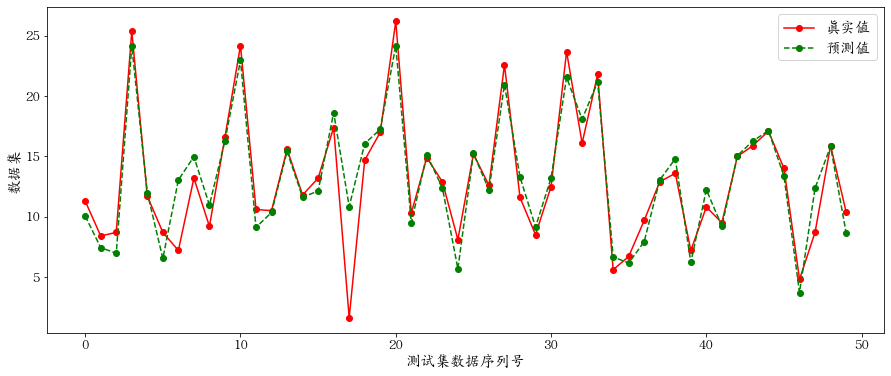

In [10]:
plt.figure(figsize=(15, 6))
plt.rcParams["font.family"] = "AR PL UKai CN"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 15
plt.plot(y_test, label='真实值', color="r", marker='o')
plt.plot(y_hat, label='预测值', color="g", ls='--',  marker='o')
plt.xlabel("测试集数据序列号")
plt.ylabel("数据集")
plt.legend()

In [11]:
# 评估模型的回归。
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("均方误差(MSE)", mean_squared_error(y_test, y_hat))
print("根方误差(RMSE)", np.sqrt(mean_squared_error(y_test, y_hat)))
print("平均绝对值误差(MAE)", mean_absolute_error(y_test, y_hat))
print("训练集R^2:", r2_score(y_train, lr.predict(X_train)))
print("测试集^2:", r2_score(y_test, y_hat))

均方误差(MSE) 3.9998526675817487
根方误差(RMSE) 1.9999631665562616
平均绝对值误差(MAE) 1.294740437794677
训练集R^2: 0.9071991785449653
测试集^2: 0.8580883042722334
